## DE Final Project Transformation

In [1]:
import pandas as pd

In [2]:
cleaned_data = pd.read_csv('/Users/kevinko/Desktop/Uchicago/Data engineering platform/Final Project/Crimes_-_2001_to_Present_20231106.csv')

In [3]:
cleaned_data = cleaned_data.dropna()

In [4]:
cleaned_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,12876758,JF455497,10/30/2022 12:00:00 AM,009XX W AINSLIE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,48.0,3,08B,1169277.0,1932978.0,2022,01/03/2023 03:40:27 PM,41.971606,-87.652922,"(41.971606371, -87.652922494)"
2,12876833,JF455538,10/30/2022 12:00:00 AM,015XX W TOUHY AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,49.0,1,06,1164815.0,1947933.0,2022,01/03/2023 03:40:27 PM,42.012739,-87.668903,"(42.012739369, -87.668903131)"
3,12877365,JF456193,10/30/2022 12:00:00 AM,082XX S LOOMIS BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,...,21.0,71,14,1168432.0,1850118.0,2022,01/03/2023 03:40:27 PM,41.744250,-87.658425,"(41.744249861, -87.658424658)"
4,12877003,JF455219,10/30/2022 12:00:00 AM,046XX S VINCENNES AVE,0810,THEFT,OVER $500,STREET,False,False,...,3.0,38,06,1180399.0,1874190.0,2022,01/03/2023 03:40:27 PM,41.810040,-87.613839,"(41.810039876, -87.613838562)"
5,12877755,JF456610,10/30/2022 12:00:00 AM,012XX S MICHIGAN AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,3.0,33,06,1177419.0,1894900.0,2022,01/03/2023 03:40:27 PM,41.866938,-87.624142,"(41.866937617, -87.624141504)"


## Cleaning the unnecessary columns 

In [5]:
cleaned_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
columns_to_drop = ['Case Number', 'Block', 'IUCR',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location']

In [7]:
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

In [8]:
cleaned_data 

,ID,Date,Primary Type,District,Ward,Community Area
1,12876758,10/30/2022 12:00:00 AM,BATTERY,20,48.0,3
2,12876833,10/30/2022 12:00:00 AM,THEFT,24,49.0,1
3,12877365,10/30/2022 12:00:00 AM,CRIMINAL DAMAGE,6,21.0,71
4,12877003,10/30/2022 12:00:00 AM,THEFT,2,3.0,38
5,12877755,10/30/2022 12:00:00 AM,THEFT,1,3.0,33
...,...,...,...,...,...,...
257334,13259485,10/29/2023 12:00:00 AM,BATTERY,10,22.0,30
257335,13260211,10/29/2023 12:00:00 AM,MOTOR VEHICLE THEFT,4,10.0,52
257336,13261862,10/29/2023 12:00:00 AM,OTHER OFFENSE,22,19.0,75
257338,13264695,10/29/2023 12:00:00 AM,DECEPTIVE PRACTICE,17,33.0,14


## Convert the date to quarter

In [9]:
import pandas as pd

# Convert 'Date' column to datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Create 'year' column
cleaned_data['year'] = cleaned_data['Date'].dt.year

# Create 'quarter' column
cleaned_data['quarter'] = cleaned_data['Date'].dt.quarter

print(cleaned_data[cleaned_data['quarter']==1])

              ID                Date                Primary Type  District  \
42214   12938772 2023-01-01 00:00:00     CRIMINAL SEXUAL ASSAULT         7   
42215   13140855 2023-01-01 00:00:00  OFFENSE INVOLVING CHILDREN         4   
42216   12976707 2023-01-01 00:00:00  OFFENSE INVOLVING CHILDREN        22   
42217   13222722 2023-01-01 00:00:00                       THEFT        20   
42218   13223672 2023-01-01 00:00:00          DECEPTIVE PRACTICE        12   
...          ...                 ...                         ...       ...   
102193  13027943 2023-03-31 23:41:00      PUBLIC PEACE VIOLATION        22   
102194  13028102 2023-03-31 23:50:00      PUBLIC PEACE VIOLATION        25   
102195  13028092 2023-03-31 23:50:00           WEAPONS VIOLATION         6   
102196  13028017 2023-03-31 23:54:00                       THEFT         1   
102197  13028289 2023-03-31 23:56:00          DECEPTIVE PRACTICE         2   

        Ward  Community Area  year  quarter  
42214   17.0     

In [99]:
cleaned_data

,ID,Date,Primary Type,District,Ward,Community Area,year,quarter
1,12876758,2022-10-30,BATTERY,20,48.0,3,2022,4
2,12876833,2022-10-30,THEFT,24,49.0,1,2022,4
3,12877365,2022-10-30,CRIMINAL DAMAGE,6,21.0,71,2022,4
4,12877003,2022-10-30,THEFT,2,3.0,38,2022,4
5,12877755,2022-10-30,THEFT,1,3.0,33,2022,4
...,...,...,...,...,...,...,...,...
257334,13259485,2023-10-29,BATTERY,10,22.0,30,2023,4
257335,13260211,2023-10-29,MOTOR VEHICLE THEFT,4,10.0,52,2023,4
257336,13261862,2023-10-29,OTHER OFFENSE,22,19.0,75,2023,4
257338,13264695,2023-10-29,DECEPTIVE PRACTICE,17,33.0,14,2023,4


## Convernt community area into neighborhood


In [11]:
community = pd.read_csv('/Users/kevinko/Desktop/Uchicago/Data engineering platform/Final Project/chicago_community_areas_transposed.csv')

In [12]:
community.head()

,community_area,name
0,1,Rogers Park
1,2,West Ridge
2,3,Uptown
3,4,Lincoln Square
4,5,North Center


In [13]:
# Assuming 'cleaned_data' DataFrame has a column 'Community Area'
# Assuming 'community' DataFrame has a column 'neighborhood_id'

# Perform a merge based on the common columns
merged_data = cleaned_data.merge(community, left_on='Community Area', right_on='community_area', how='left')

# 'how' parameter determines the type of merge. Here 'left' ensures all rows from 'cleaned_data' are kept

# Display the merged DataFrame
print(merged_data)


              ID       Date         Primary Type  District  Ward  \
0       12876758 2022-10-30              BATTERY        20  48.0   
1       12876833 2022-10-30                THEFT        24  49.0   
2       12877365 2022-10-30      CRIMINAL DAMAGE         6  21.0   
3       12877003 2022-10-30                THEFT         2   3.0   
4       12877755 2022-10-30                THEFT         1   3.0   
...          ...        ...                  ...       ...   ...   
253837  13259485 2023-10-29              BATTERY        10  22.0   
253838  13260211 2023-10-29  MOTOR VEHICLE THEFT         4  10.0   
253839  13261862 2023-10-29        OTHER OFFENSE        22  19.0   
253840  13264695 2023-10-29   DECEPTIVE PRACTICE        17  33.0   
253841  13259776 2023-10-29              BATTERY        18  32.0   

        Community Area  year  quarter  community_area             name  
0                    3  2022        4               3           Uptown  
1                    1  2022        4

## Convert Crime type to valid score

In [14]:
crime = pd.read_excel('/Users/kevinko/Desktop/Uchicago/Data engineering platform/Final Project/Criminal type numerical scale_cleaned.xlsx')

In [15]:
crime.columns

Index(['Primary Type', 'Score'], dtype='object')

In [16]:
merged_data_2 = merged_data.merge(crime, left_on='Primary Type', right_on='Primary Type', how='left')


# Display the merged DataFrame
print(merged_data_2)


              ID       Date         Primary Type  District  Ward  \
0       12876758 2022-10-30              BATTERY        20  48.0   
1       12876833 2022-10-30                THEFT        24  49.0   
2       12877365 2022-10-30      CRIMINAL DAMAGE         6  21.0   
3       12877003 2022-10-30                THEFT         2   3.0   
4       12877755 2022-10-30                THEFT         1   3.0   
...          ...        ...                  ...       ...   ...   
253837  13259485 2023-10-29              BATTERY        10  22.0   
253838  13260211 2023-10-29  MOTOR VEHICLE THEFT         4  10.0   
253839  13261862 2023-10-29        OTHER OFFENSE        22  19.0   
253840  13264695 2023-10-29   DECEPTIVE PRACTICE        17  33.0   
253841  13259776 2023-10-29              BATTERY        18  32.0   

        Community Area  year  quarter  community_area             name  Score  
0                    3  2022        4               3           Uptown      7  
1                    1 

In [17]:
merged_data_2.columns

Index(['ID', 'Date', 'Primary Type', 'District', 'Ward', 'Community Area',
       'year', 'quarter', 'community_area', 'name', 'Score'],
      dtype='object')

In [18]:
drop_column_2 = ['District', 'Ward', 'Community Area', 'community_area']

In [19]:
cleaned_crime_data = merged_data_2.drop(columns=drop_column_2)

## Rename name to neighbourhood

In [20]:
average_scores = cleaned_crime_data.groupby(['quarter', 'year', 'name'])['Score'].mean().reset_index()

print(average_scores.round(2))


     quarter  year            name  Score
0          1  2023     Albany Park   5.88
1          1  2023  Archer Heights   5.68
2          1  2023   Armour Square   5.69
3          1  2023         Ashburn   5.75
4          1  2023  Auburn Gresham   5.89
..       ...   ...             ...    ...
380        4  2023       West Lawn   5.70
381        4  2023    West Pullman   6.25
382        4  2023      West Ridge   5.83
383        4  2023       West Town   5.84
384        4  2023        Woodlawn   6.12

[385 rows x 4 columns]


In [21]:
df = pd.merge(cleaned_crime_data, average_scores.round(2), on=['quarter', 'year', 'name'], how='left', suffixes=('', '_avg'))

renaming name to neighbourhood

In [22]:
df = df.rename(columns={'name': 'neighbourhood'})

In [23]:
df.to_csv('cleaned_crime.csv', index=False)

Airbnb Listing

In [24]:
listing = pd.read_csv('/Users/kevinko/Desktop/Uchicago/Data engineering platform/Final Project/listings.csv')

In [25]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,114,3,227,2023-09-03,2.15,1,322,20,R17000015609
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,92,32,505,2023-08-30,2.92,1,347,45,R21000075737
2,10945,Rental unit in Chicago · ★4.65 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,170,4,72,2023-08-29,0.63,7,146,16,2209984
3,12140,Boutique hotel in Chicago · ★4.93 · 1 bedroom ...,46734,Shay And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,15,2023-05-21,0.15,1,165,3,R20000055258
4,24833,Rental unit in Chicago · ★4.29 · 1 bedroom · 1...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,61,32,42,2023-04-22,0.26,4,284,2,City registration pending


In [26]:
import pandas as pd

# Convert 'Date' column to datetime format
listing['Date'] = pd.to_datetime(listing['last_review'])

# Create 'year' column
listing['year'] = listing['Date'].dt.year

# Create 'quarter' column
listing['quarter'] = listing['Date'].dt.quarter

print(listing[listing['quarter']==1])


                      id                                               name  \
7                  37738  Home in Chicago · ★4.99 · 1 bedroom · 1 bed · ...   
22                290155  Rental unit in Chicago · ★4.84 · 3 bedrooms · ...   
23                312192  Rental unit in Chicago · ★4.74 · 2 bedrooms · ...   
37                697634  Rental unit in Chicago · ★4.87 · 2 bedrooms · ...   
41                790934  Rental unit in Chicago · ★4.66 · 1 bedroom · 1...   
...                  ...                                                ...   
6643  802996947331300153  Rental unit in Chicago · 1 bedroom · 1 bed · 1...   
6651  804194515694924457  Rental unit in Chicago · 1 bedroom · 1 bed · 2...   
6675  808108595377919122  Rental unit in Chicago · 6 bedrooms · 6 beds ·...   
6967  843363792290207058  Home in Chicago · 1 bedroom · 1 bed · 1 shared...   
7033  850920931817664712  Rental unit in Chicago · 1 bedroom · 1 bed · 1...   

        host_id      host_name  neighbourhood_group

In [27]:
listing = listing.dropna(subset=['year', 'quarter'])

listing['year'] = listing['year'].astype(int)
listing['quarter'] = listing['quarter'].astype(int)

In [28]:
df.columns
listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'Date', 'year',
       'quarter'],
      dtype='object')

In [29]:
final  = listing.merge(df, on=['year', 'quarter', 'neighbourhood'], how='left')


In [30]:
final.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'Date_x',
       'year', 'quarter', 'ID', 'Date_y', 'Primary Type', 'Score',
       'Score_avg'],
      dtype='object')

In [31]:
final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews_ltm,license,Date_x,year,quarter,ID,Date_y,Primary Type,Score,Score_avg
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.7879,-87.5878,Private room,114,...,20,R17000015609,2023-09-03,2023,3,13125573.0,2023-07-01 01:00:00,ROBBERY,6.0,5.72
1,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.7879,-87.5878,Private room,114,...,20,R17000015609,2023-09-03,2023,3,13129072.0,2023-07-01 01:00:00,THEFT,5.0,5.72
2,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.7879,-87.5878,Private room,114,...,20,R17000015609,2023-09-03,2023,3,13125564.0,2023-07-01 01:05:00,BATTERY,7.0,5.72
3,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.7879,-87.5878,Private room,114,...,20,R17000015609,2023-09-03,2023,3,13125701.0,2023-07-01 01:45:00,ROBBERY,6.0,5.72
4,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.7879,-87.5878,Private room,114,...,20,R17000015609,2023-09-03,2023,3,13126849.0,2023-07-01 15:00:00,THEFT,5.0,5.72


In [33]:
# Replace 'quarter' and 'neighbourhood' with the actual column names from your DataFrame
average_price = final.groupby(['quarter', 'neighbourhood'])['price'].mean().reset_index()

final = pd.merge(final, average_price, on=['quarter', 'neighbourhood'], how='left', suffixes=('', '_avg'))

# Display the updated DataFrame
print(final)

                         id  \
0                      2384   
1                      2384   
2                      2384   
3                      2384   
4                      2384   
...                     ...   
8383315  973015093684752148   
8383316  973015093684752148   
8383317  973015093684752148   
8383318  973015093684752148   
8383319  973015093684752148   

                                                      name   host_id  \
0        Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...      2613   
1        Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...      2613   
2        Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...      2613   
3        Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...      2613   
4        Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...      2613   
...                                                    ...       ...   
8383315  Rental unit in Chicago · ★New · 2 bedrooms · 2...  67751745   
8383316  Rental unit in Chicago · ★New · 2 bedrooms

## Scatter plot for average price and avreage crime score

In [37]:
correlation = final['price_avg'].corr(final['Score_avg'])

print(f"Correlation between average_price and score_avg: {correlation}")

Correlation between average_price and score_avg: -0.644663922818268


In [57]:
print(final[['Score_avg', 'price_avg']].isnull().sum())



Score_avg    1071
price_avg       0
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


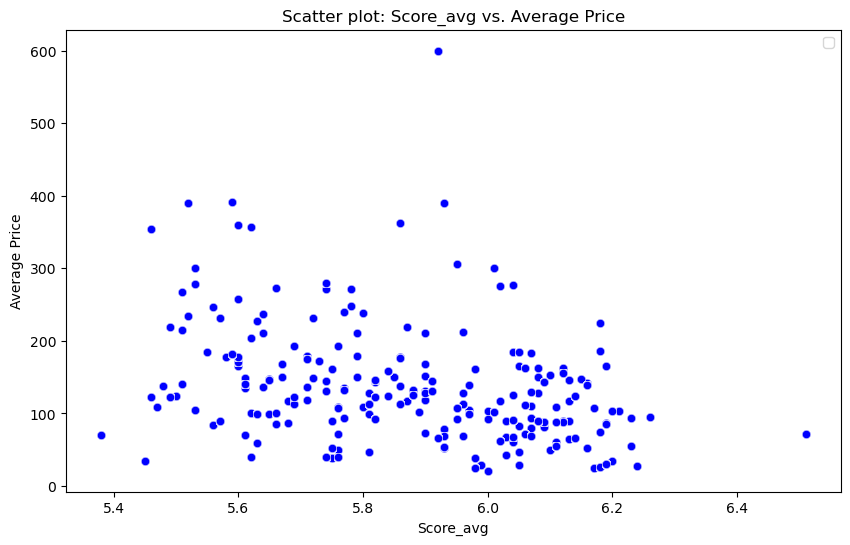

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming 'score_avg' and 'average_price' are the column names in your DataFrame
x = final['Score_avg']
y = final['price_avg']

# Drop NaN values before performing linear regression
data = pd.concat([x, y], axis=1).dropna()

# Perform linear regression
result = linregress(x, y)


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', alpha=0.5)

# Plot the regression line
plt.plot(x, result.intercept + result.slope * x, color='red', linewidth=10)

# Add labels and title
plt.xlabel('Score_avg')
plt.ylabel('Average Price')
plt.title('Scatter plot: Score_avg vs. Average Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [68]:
# Find the neighborhood with the highest Score_avg and avg_price
neighborhood_highest_score = final.loc[final['Score_avg'].idxmax()]['neighbourhood']
highest_score_value = final['Score_avg'].max()

neighborhood_highest_price = final.loc[final['price_avg'].idxmax()]['neighbourhood']
highest_price_value = final['price_avg'].max()


# Find the neighborhood with the lowest Score_avg and avg_price
neighborhood_lowest_score = final.loc[final['Score_avg'].idxmin()]['neighbourhood']
lowest_score_value = final['Score_avg'].min()

neighborhood_lowest_price = final.loc[final['price_avg'].idxmin()]['neighbourhood']
lowest_price_value = final['price_avg'].min()

# Print the results
print(f"The neighborhood with the highest Score_avg is '{neighborhood_highest_score}' with a score of {highest_score_value:.2f}")
print(f"The neighborhood with the lowest Score_avg is '{neighborhood_lowest_score}' with a score of {lowest_score_value:.2f}")
print(f"The neighborhood with the highest Score_avg is '{neighborhood_highest_price}' with a score of {highest_price_value:.2f}")
print(f"The neighborhood with the lowest Score_avg is '{neighborhood_lowest_price}' with a score of {lowest_price_value:.2f}")


The neighborhood with the highest Score_avg is 'Riverdale' with a score of 6.51
The neighborhood with the lowest Score_avg is 'Portage Park' with a score of 5.38
The neighborhood with the highest Score_avg is 'Mckinley Park' with a score of 1032.50
The neighborhood with the lowest Score_avg is 'East Side' with a score of 21.00


In [127]:
# Group by neighborhood and calculate the mean Score_avg for each neighborhood
neighborhood_scores = final.groupby('neighbourhood')['Score_avg'].mean()

# Get the top 10 neighborhoods with the highest mean Score_avg
top_10_neighborhoods_highest_score = neighborhood_scores.nlargest(10).reset_index()

# Print the result
print("Top 10 Neighborhoods with the Highest Mean Score_avg:")
print(top_10_neighborhoods_highest_score)


Top 10 Neighborhoods with the Highest Mean Score_avg:
        neighbourhood  Score_avg
0           Riverdale   6.510000
1       South Chicago   6.210331
2       Brighton Park   6.209962
3           Englewood   6.193127
4           Gage Park   6.190000
5      South Lawndale   6.188857
6       Armour Square   6.178836
7          Bridgeport   6.166885
8      North Lawndale   6.166356
9  East Garfield Park   6.140748
